In [39]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from backtesting.test import EURUSD, SMA
from sklearn.dummy import DummyRegressor

df = EURUSD.copy()


# Load the data
# df = pd.read_csv("EURUSD.csv")

# Calculate the features
df["EMA"] = df["Close"].ewm(span=10).mean() # Exponential Moving Average
df["RSI"] = 100 - (100 / (1 + df["Close"].diff().apply(lambda x: x if x > 0 else 0).ewm(span=14).mean() / df["Close"].diff().apply(lambda x: -x if x < 0 else 0).ewm(span=14).mean())) # Relative Strength Index
df["OBV"] = df["Volume"] * np.sign(df["Close"].diff()).cumsum() # On Balance Volume
df["Sentiment"] = np.random.randint(-1, 2, len(df)) # Twitter sentiment indicator (dummy values)

# Drop the rows with missing values
df.dropna(inplace=True)

# Define the label
df["Label"] = df["Close"].shift(-1) # Lagging value of the exchange rate
df.dropna(subset=["Label"], inplace=True)

# Split the data into features and label
X = df[["Open", "High", "Low", "Close", "EMA", "RSI", "OBV", "Sentiment"]]
y = df["Label"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# model = DummyRegressor(strategy="mean")
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")


Root Mean Squared Error: 0.0126


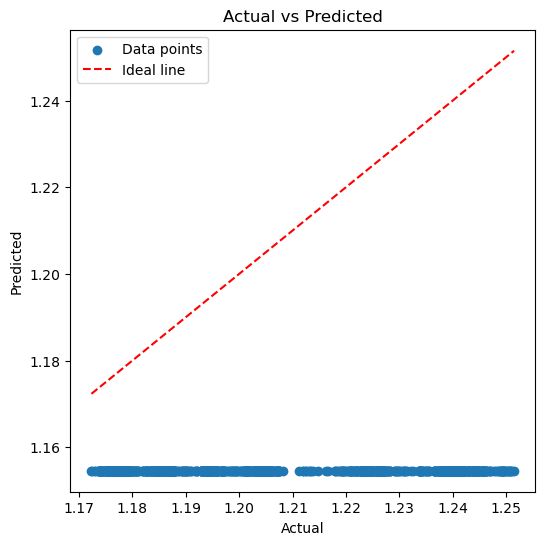

In [33]:
import matplotlib.pyplot as plt

# Plot the actual values against the predicted values
# Plot the actual values against the predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, label="Data points") # Add label for blue dots
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Ideal line") # Add label for red dashed line
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend() # Add legend to the plot
plt.show()


In [ ]:
Root Mean Squared Error: 0.0199

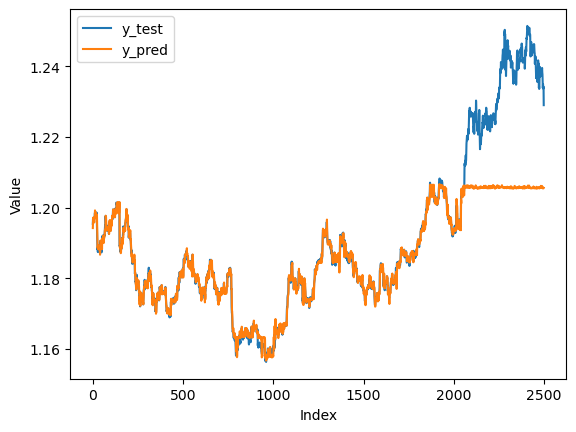

In [40]:
import matplotlib.pyplot as plt
# add y_test and y_pred to the plot
y_test_pred 
# assuming y_test and y_pred are numpy arrays of the same length
plt.plot(np.arange(len(y_test)), y_test, label="y_test")
plt.plot(np.arange(len(y_pred)), y_pred, label="y_pred")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

In [24]:
df

,Open,High,Low,Close,Volume,EMA,RSI,OBV,Sentiment,Label
2017-04-19 10:00:00,1.07214,1.07296,1.07214,1.07260,1241,1.072415,100.000000,1241.0,1,1.07192
2017-04-19 11:00:00,1.07256,1.07299,1.07170,1.07192,1025,1.072216,34.320670,0.0,-1,1.07202
2017-04-19 12:00:00,1.07195,1.07280,1.07195,1.07202,1460,1.072152,40.906458,1460.0,1,1.07050
2017-04-19 13:00:00,1.07200,1.07230,1.07045,1.07050,1554,1.071677,14.828627,0.0,0,1.07128
2017-04-19 14:00:00,1.07054,1.07202,1.07044,1.07128,2342,1.071574,38.168102,2342.0,-1,1.07064
...,...,...,...,...,...,...,...,...,...,...
2018-02-07 10:00:00,1.23510,1.23526,1.23375,1.23390,2872,1.237128,22.562457,249864.0,-1,1.23501
2018-02-07 11:00:00,1.23390,1.23548,1.23386,1.23501,2203,1.236743,33.991858,193864.0,-1,1.23422
2018-02-07 12:00:00,1.23501,1.23508,1.23342,1.23422,2325,1.236284,30.317230,202275.0,1,1.23372
2018-02-07 13:00:00,1.23422,1.23459,1.23338,1.23372,2824,1.235818,28.098935,242864.0,1,1.23426


In [8]:
# check if y_test contains NaNs
y_test.isna().sum()
convert

1

In [10]:
# check if y_pred contains NaNs
np.isnan(y_pred).sum()


0

In [11]:
print(df.tail(1))

                        Open     High      Low    Close  Volume       EMA  \
2018-02-07 15:00:00  1.23427  1.23444  1.22904  1.22904    6143  1.234354   

                           RSI       OBV  Sentiment  Label  
2018-02-07 15:00:00  17.653501  528298.0         -1    NaN  
